<a href="https://colab.research.google.com/github/Darsana33/datascience_lab/blob/main/Darsana_EXP9_HandWrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#load MNIST dataset available in Keras library
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# To Know No. of Examples in Training Dataset

In [17]:
# No. of examples in train dataset
print('Length of Xtrain',len(X_train))
print(type(X_train))
# No. of examples in test dataset
print('Length of Xtest',len(X_test))
print("Dimension of Xtrain:",X_train.ndim)
print("Shape of Xtrain:",X_train.shape)

Length of Xtrain 60000
<class 'numpy.ndarray'>
Length of Xtest 10000
Dimension of Xtrain: 3
Shape of Xtrain: (60000, 28, 28)


In [6]:
# Give details of an image in the dataset
X_train[0].shape

(28, 28)

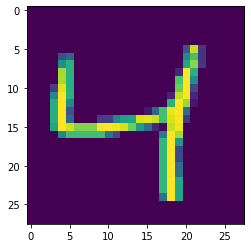

In [19]:
#matshow() function OR imshow() function is used to represent an array as a matrix in a new figure window. 
#plt.matshow(X_train[0]) OR plt.imshow(X_train[2])
plt.imshow(X_train[2])


In [21]:
#  Scale the values in Xtrain & Xtest 

X_train = X_train / 255
X_test = X_test / 255

# Display the length of X_train
X_train[2]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [23]:
# Flattening Xtrain & Xtest to a 2D array

X_train_flattened = X_train.reshape(-1,784)
X_test_flattened = X_test.reshape(-1,784)

#Display the shape of flattened Xtrain & Xtest
X_train_flattened.shape

(60000, 784)

In [32]:
#Build the model 
model = keras.Sequential([keras.layers.Dense(10,activation='sigmoid')])
# Apply 'adam' optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Train the model using fit(). Give epoch as 10
model.fit(X_train_flattened,y_train,epochs=10)
#Evaluate the model 
model.evaluate(X_test_flattened, y_test)

#Predict the values for flattened test dataset
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

#Display the first row of y_predicted
y_predicted[1]


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1883 - accuracy: 0.6108
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9772 - accuracy: 0.7046
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7905 - accuracy: 0.7385
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6266 - accuracy: 0.7607
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4837 - accuracy: 0.7745
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3602 - accuracy: 0.7890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2535 - accuracy: 0.7983
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1615 - accuracy: 0.8080
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0823 - accuracy: 0.8156
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.9635 

array([0.2979106 , 0.29029155, 0.71323603, 0.5590846 , 0.0641551 ,
       0.4545383 , 0.5627532 , 0.03823042, 0.33616003, 0.06043157],
      dtype=float32)

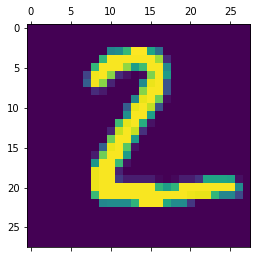

In [35]:
# Display the predicted value by applying argmax()
np.argmax(y_predicted[0])
#Confirm the prediction by displaying the corresponding pixel values using matshow() ir imshow()
plt.matshow(X_test[1])


In [34]:
#Display the predicted values  for test dataset. Display only first 5 predicted values
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

#Construct the Confusion Matrix 


[7, 2, 1, 0, 4]

In [36]:
#Display confusion matrix using heatmap
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


NameError: ignored

<Figure size 720x504 with 0 Axes>

USING HIDDEN LAYER

In [8]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(X_train_flattened, y_train, epochs=5)

NameError: ignored

In [ ]:
model.evaluate(X_test_flattened,y_test)

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
y_predicted[0]

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


In [ ]:
plt.matshow(X_test[0])

USING FLATTEN LAYER TO CONVERT 2D to 1D

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10)

In [ ]:
model.evaluate(X_test,y_test)